In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("instagram_reach.csv",index_col=0)

In [5]:
df.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 12
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               100 non-null    int64 
 1   USERNAME           100 non-null    object
 2   Caption            94 non-null     object
 3   Followers          100 non-null    int64 
 4   Hashtags           100 non-null    object
 5   Time since posted  100 non-null    object
 6   Likes              100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 6.2+ KB


# Data Exploration 

In [11]:
#Convert timesince posted to numeric
df["Time since posted(hours)"]= [int(i.split(" ")[0]) for i in df["Time since posted"]]

In [13]:
df.drop("Time since posted",axis=1,inplace=True)

In [32]:
#Get the major Hash tags used in the given data sets using Wordcloud

from wordcloud import WordCloud
wc = WordCloud(mode = 'RGBA',background_color='white')


In [18]:
#Get the hashtags in the form of text
text = ''
for i in df["Hashtags"]:
    text+=i

In [27]:
word_freq = wc.process_text(text)

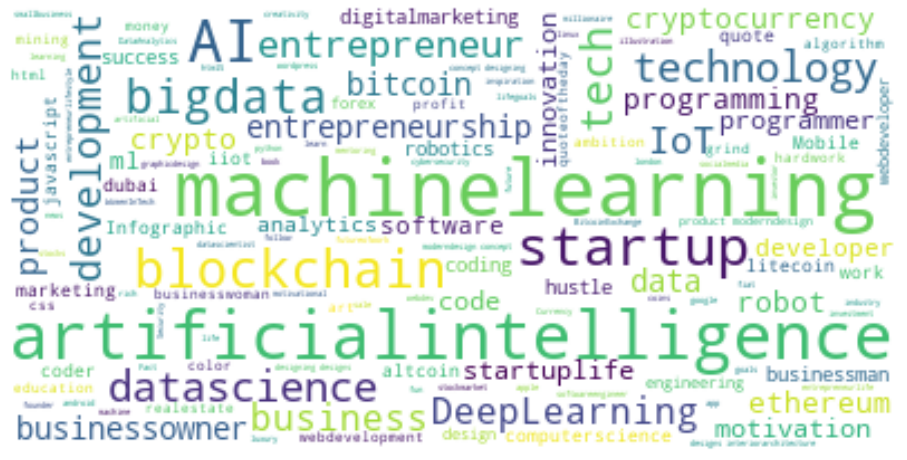

In [33]:
wc.generate_from_frequencies(word_freq)

plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**From the word cloud it is very clear that the instagram data is mainly based on Technological stack like Artificial intelligence, machine learning, data science , start ups e.t.c**

In [44]:
# similiarly we can do the same with captions as well to get the interest of users in data set using word cloud
caps = ''
for i in df['Caption']:
    if type(i) == float:
        i = 'none'

In [46]:
caps = ''
for i in df['Caption']:
    caps += str(i)

In [47]:
wc.generate_from_text(caps)

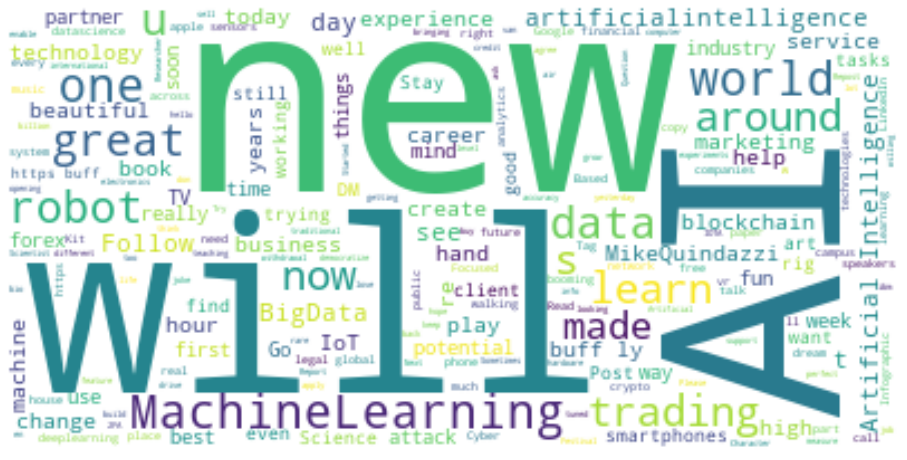

In [48]:
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**The word cloud depicts similar to hashtags also talks about AI Machinelearning data and other Technologies**

In [51]:
df

,S.No,USERNAME,Caption,Followers,Hashtags,Likes,Time since posted(hours)
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3
...,...,...,...,...,...,...,...
8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,31,3
9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,42,3
10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,10,3
11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,222,3


<AxesSubplot:>

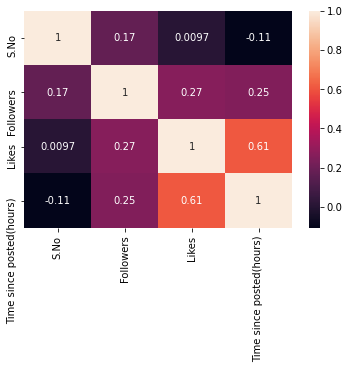

In [55]:
sns.heatmap(df.corr(),annot=True)

In [82]:
x = df[["Followers",'Time since posted(hours)']]
y = df['Likes']

In [85]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(x,y)

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(trainx,trainy)

In [87]:
yp = lr.predict(testx)

In [94]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(testy,yp)

-0.07794143100109974

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(trainx,trainy)

In [92]:
yp = rf.predict(testx)

In [93]:
r2_score(testy,yp)

-0.07794143100109974

In [95]:
mean_absolute_error(testy,yp)

38.7988